# Moniosainen ryhmätyö

Tämän ryhmätyön avulla voidaan havainnollistaa tieteellistä lähestymistapaa, missä useampi itsenäinen ryhmä kantaa oman kortensa kekoon kiinnostavien lopputulosten saavuttamiseksi. Tehtävän ideana on, että oppilaat jaetaan 3-5 ryhmään, joilla kaikilla on omat vastuualueensa ja aikataulunsa ryhmätyön suorittamisessa.

Ryhmätyössä ensimmäinen ryhmä valmistelee datan, johon muiden ryhmien tehtävänannot perustuvat. Mikäli joitain virheitä tulee, niin virheet siirtyvät luonnollisesti eteenpäin ryhmältä seuraavalla "rikkinäisen puhelimen" tapaan. Tämän lisäksi ryhmille on esitetty kysymyksiä, joihin heidän tulee vastata sanallisesti osana raporttia. Lopulta muodostetut kuvaajat sekä raportti lähetetään suoraan seuraavalle ryhmälle, joka kirjoittaa oman raporttinsa tähän pohjautuen. Viimeisen ryhmän tehtävänä on muodostaa yhteenvetoraportti, sekä esittää saadut lopputulokset muille oppilaille.

Jokainen ryhmä toimii itsenäisesti ryhmäkohtaisen aikataulunsa mukaan. Ryhmät voivat keksiä omalle tutkimusryhmälleen nimen, jonka lisäksi tulisi sopia myös siitä, miten heidän ryhmälle voidaan esittää tarvittaessa kysymyksiä. Tämä voidaan toteuttaa esimerkiksi viiden minuutin kysymystuokiolla tiettyjen oppituntien jälkeen, sähköpostitse jne. Ryhmiä myös kannustetaan esittämään ainakin yksi kysymys edeltävälle ryhmälle.

Tähän tiedostoon on koostettu jokaisen ryhmän tehtävät. Erilliset ryhmäkohtaiset pohjat löytyvät täältä XXX.

# Ryhmä 1

Teidän tehtävänänne on selvittää, kuinka ruuan kuljettaminen jakautuu eri kuljetusmuotojen kesken – kunka paljon ruokaa kuljetetaan keskimäärin ilmateitse, meriteitse, rautateitse ja autoteitse. Tähän tarvittava data löytyy tiedostosta "food_miles_by_method.csv". Lopputuloksena teidän tulee palauttaa raportti, joka sisältää tarvittavat kuvaajat, selityksen kuvaajien sisällöstä sekä vastaukset alla listattuihin kysymyksiin.

## Osa 1: Ruoka-aineiden kuljetus

In [93]:
# Aloitetaan ensin lataamalla tarvittavat paketit, joita voidaan hyödyntää kuvaajien muodostamisessa.

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import csv

In [98]:
# Luetaan tiedosto, josta löytyy tarvittava data.

matkustustavat = pd.read_csv('../data/food_miles_by_method.csv')

In [99]:
# Ajamalla tämän solun, voit nähdä mitä dataa meidän tiedosto sisältääkään.

matkustustavat.head()

,Kulkuvayla,Vuosi,Osuus ruoan kuljetuksesta (Poore & Nemecek 2018),Kuljetuksen paastot ilman lampotilan saatelya (kgCO2eq per tonne-kilometer) (Poore & Nemecek 2018)
0,Ilma,2010,0.16,1.13
1,Rautatie,2010,9.90,0.05
2,Maantie,2010,30.97,0.20
3,Vesi,2010,58.97,0.10


Pysähdytään hetkeksi tähän ja tutkitaan saamaamme taulukkoa. Mitä tietoja taulukosta löytyy? Mitä tarkoitetaan yksikössä esiintyvällä hiilidioksidiekvivalentilla ja tonni-kilometrillä? Mistä nämä taulukon tiedot ovat peräisin?


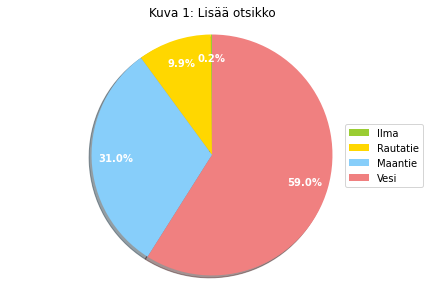

In [100]:
lista1 = [] # Luodaan ensin kaksi tyhjää listaa, minne voidaan tallentaa kuvaajia varten tarvittavat tiedot.
lista2 = []

with open("../data/food_miles_by_method.csv", "r") as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',') # Luetaan tiedostojen sisällöt
    for lines in csv_reader:
        lista1.append(lines['Kulkuvayla']) # Lisätään kulkuneuvotyypit listaan 1
        lista2.append(lines['Osuus ruoan kuljetuksesta (Poore & Nemecek 2018)']) # Lisätään ruokakuljetusosuudet listaan 2
   
labels = lista1 # Tallennetaan kulkuneuvot muuttujaan 'labels'
sizes = lista2 # Tallennetaan ruokakuljetusosuudet muuttujaan 'sizes'

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral'] # Valitaan osioiden värit. Voitte valita värit itse.

patches, texts, pcts = plt.pie(sizes, colors=colors, autopct='%.1f%%', pctdistance=0.8, shadow=True, startangle=90)
plt.legend(patches, labels, bbox_to_anchor=(1,0.5), loc="center right", bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0, bottom=0.1, right=1)
plt.gca().axis("equal")
plt.setp(pcts, color='white', fontweight='bold')
plt.tight_layout()

plt.title ("Kuva 1: Lisää otsikko") # Lisätkää kuvaajalle sopiva otsikko, mitä tällä kuvaajalla kerrotaan?
plt.show()

## Osa 2: Kuljetuksesta syntyvät päästöt

Muodostetaan myös taulukko eri kuljetusmuotojen päästöistä, jotta voidaan paremmin vertailla niitä keskenään.

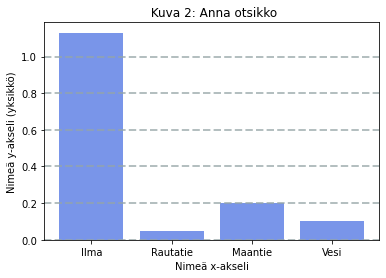

In [103]:
lista3 = [] # Luodaan vielä yksi tyhjä lista

with open("../data/food_miles_by_method.csv", "r") as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',') # Luetaan tiedostojen sisällöt
    for lines in csv_reader:
        lista3.append(lines['Kuljetuksen paastot ilman lampotilan saatelya (kgCO2eq per tonne-kilometer) (Poore & Nemecek 2018)'])
# Listätään tyhjään listaan kulkuneuvojen kulutukseen liittyvät tiedot

data = list(map(float, lista3)) # Muutetaan lista käyttökelpoiseksi ja tallennetaan se muuttujaan 'data'

plt.bar(labels, data, color='royalblue', alpha=0.7) # aikaisemman solun ansiosta 'labels' sisltää jo tiedon
# tarkasteltavista kulkuvälineistä

plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

plt.xlabel('Nimeä x-akseli') # Nimeä y-akseli
plt.ylabel('Nimeä y-akseli (yksikkö)') # Nimeä x-akseli
plt.title(' Kuva 2: Anna otsikko') # Anna kuvaajalle sopiva otsikko
plt.show()

Mitä tekemänne kuvaajat kertovat? Mitä ajatuksia ne herättävät? Milloin tiettyjä kuljetusmuotoja voisi olla hyväksyttävää käyttää, milloin taas ei? Pitäisikö jostain kuljetusmuodosta luopua, vai löytyykö kaikille paikkansa?

## Osa 3: Kaupunkien valinta

Valitkaa ryhmänne kesken kolme kaupunkia eri puolilta maapalloa, ja selvittäkää niiden etäisyys Helsinkiin.

In [12]:
# Tässä solussa annetaan halutut tiedot taulukkoa varten. Korvatkaa Kaupunki 1 teidän ensimmäisen kaupunkinne nimellä,
# ja sitä vastaavaan etäisyys-kohtaan etäisyys Helsinkiin. Muistakaa täydentää taulukon sulkeisiin (yksikkö)
# käyttämänne etäisyyden yksikkö.

# Lopullisen taulukon tiedot sijaitsevat tämän jälkeen listassa'taulukko'.

taulukko = [['Kaupunki', 'Etäisyys Helsinkiin (yksikkö)'],
            ['Kaupunki 1', 'etäisyys 1'],
            ['Kaupunki 2', 'etäisyys 2'],
            ['Kaupunki 3', 'etäisyys 3']]

In [19]:
# Kun ajatte tämän solun, tämä solu kokoaa ylläolevan 'taulukko'-listan tiedot varsinaiseksi taulukoksi.

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in taulukko)
       )
))

# OTSIKON PAIKKA TAULUKKOON

Kaupunki,Etäisyys Helsinkiin (yksikkö)
Kaupunki 1,etäisyys 1
Kaupunki 2,etäisyys 2
Kaupunki 3,etäisyys 3


Taulukoiden luvut eri ruoan kuljetukseen käytettävien kulkuvälineiden aiheuttamille päästöille ovat keskiarvoja. Miettikää mitkä tekijät voivat vaikuttaa selvittämienne arvojen suuruuteen – missä tilanteissa luvut voisivat olla suurempia, missä tilanteessa pienempiä. Milloin näillä asioilla voisi olla vaikutusta?

Miksi valitsitte nämä kolme kaupunkia lähempään tarkasteluun?

Kirjoittakaa lopuksi raportti, johon sisällytätte
1. tekemänne kuvaajat ja niiden sanalliset selitykset
2. havainnot kuvaajista
3. vastaukset kysymyksiin
4. tieto siitä, miten teidän ryhmään voi ottaa yhteyttä jatkokysymyksiin liittyen

Raportti on tärkeää kirjoittaa niin, että jatkava ryhmä saa tarpeeksi tietoa selvittämistänne asioista, yksinkertaisesti ja kattavasti.

# Ryhmät 2 ja 3

Teidän tehtävänänne on tutustua ensimmäisen ryhmän tekemään raporttiin, josta saatte tarvitsemanne datan ja tiedon omien kuvaajien tekemiseen. Tämän jälkeen tutustukaa teille annettuun tiedostoon 'food-emissions-supply-chain.csv', jossa on listattuna joitakin ruoka-aineita ja niistä syntyviä päästöjä.

Valitkaa yksi ruoka-aine (Ryhmä 2 - kasvis, Ryhmä 3 - liha), jota tarkastelette lähemmin vertailemalla eri kuljetusmuotojen vaikutusta tuotteen kokonaispäästöihin, kun 1 kg tuotetta kuljetetaan ensimmäisen ryhmän valitsemista kaupungeista Helsinkiin. Tämän lisäksi tarkastellaan vielä sitä, mistä ruuantuotannon vaiheista valitsemanne tuotteen hiilidioksidipäästöt koostuvat. Lopputuloksena teidän tulee palauttaa raportti, joka sisältää tarvittavat kuvaajat, selityksen kuvaajien sisällöstä sekä vastaukset alla listattuihin kysymyksiin.

## Osa 1: Tuotteen valinta ja kuljetuksen vaikutus

In [106]:
# Ladataan ensin annettu csv-tiedosto käytettäväksi 'ruuat'-nimiseen muuttujaan.

ruuat = pd.read_csv('../data/food-emissions-supply-chain.csv')

In [107]:
# Tämä solu mahdollistaa sen, että voidaan tulostaa tiedoston kaikki rivit tarkasteltavaksi.

pd.set_option("max_rows", None)
ruuat

,Ruoka-aine,Koodi,Vuosi,Paastot maankaytosta,Paastot maanviljelysta,Paastot elaimen ruoasta,Paastot ruoan prosessoinnista,Paastot kuljetuksesta,Paastot jakelusta,Paastot pakkauksesta
0,Omenat,NaN,2018,0.0,0.2,0.0,0.0,0.1,0.0,0.0
1,Banaanit,NaN,2018,0.0,0.3,0.0,0.1,0.3,0.0,0.1
2,Ohra,NaN,2018,0.0,0.2,0.0,0.1,0.0,0.3,0.5
3,Nauta (lihakarja),NaN,2018,16.3,39.4,1.9,1.3,0.3,0.2,0.2
4,Nauta (maitotuotteet),NaN,2018,0.9,15.7,2.5,1.1,0.4,0.2,0.3
5,Sokerijuurikkaan sokeri,NaN,2018,0.0,0.5,0.0,0.2,0.6,0.0,0.1
6,Marjat ja rypaleet,NaN,2018,0.0,0.7,0.0,0.0,0.2,0.0,0.2
7,Kaalit,NaN,2018,0.0,0.3,0.0,0.0,0.1,0.0,0.0
8,Ruokosokeri,NaN,2018,1.2,0.5,0.0,0.0,0.8,0.0,0.1
9,Maniokki,NaN,2018,0.6,0.2,0.0,0.0,0.1,0.0,0.0


Nyt kun olette saaneet taulukon sisällön itsellenne tarkasteltavaksi, on aika valita teitä kiinnostava ruoka-aine. Tämän jälkeen lasketaan tuotteen hiilidioksidipäästöt ilman kuljetuksen osuutta, jonka jälkeen voidaan laskea eri kuljetusmuotojen sekä kuljetettavan matkan vaikutus kokonaispäästöihin.

Taulukossa esitettyjen lukujen yksikkö on kgCo2eq.
Esimerkiksi jos tuotteen hiilidioksidipäästöt ilman kuljetusta on 5 kgCO2eq (yhtä kilogrammaa kohden), kilogramma tuotetta kuljetetaan tuottajalta 50km matka junalla Helsinkiin, saadaan päästöiksi 5 kgCO2eq + 0.05 kgCO2eq * 50 km / 1000 kg = 5.0025 kgCO2eq yhtä kilogrammaa kohden.

In [20]:
# Taulukkoa varten täydennetään lista, joka sisältää tarvittavat tiedot – valitsemanne ruuan, eri lähtökaupungit,
# kuljetettava matka sekä siihen liittyvät hiilijalanjäljet eri kuljetusmuodoilla.

# Taulukossa voitte halutessanne pitää sarakkeiden otsikot muodossa 'Hiilipäästöt 1' jne, mutta muistakaa
# sitten selvittää tekstissä, mitä kuljetusmuotoa mikäkin sarake vastaa.

ruoka_1 = [['Ruoka','Lähtökaupaunki', 'Etäisyys Helsinkiin', 'Hiilipäästöt 1 (yksikkö)', 'Hiilipäästöt 2 (yksikkö)',
            'Hiilipäästöt 3 (yksikkö)', 'Hiilipäästöt 4 (yksikkö)'],
           ['x','Maa 1', 'etäisyys','luku 1','luku 2','luku 3','luku 4'],
           ['x','Maa 2', 'etäisyys','luku 1','luku 2','luku 3','luku 4'],
          ['x','Maa 3', 'etäisyys','luku 1','luku 2','luku 3','luku 4']]

In [21]:
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in ruoka_1)
       )
))

Ruoka,Lähtökaupaunki,Etäisyys Helsinkiin,Hiilipäästöt 1 (yksikkö),Hiilipäästöt 2 (yksikkö),Hiilipäästöt 3 (yksikkö),Hiilipäästöt 4 (yksikkö)
x,Maa 1,etäisyys,luku 1,luku 2,luku 3,luku 4
x,Maa 2,etäisyys,luku 1,luku 2,luku 3,luku 4
x,Maa 3,etäisyys,luku 1,luku 2,luku 3,luku 4


Huomatkaa, että alkuperäisessä taulukossa kuljetuksen aiheuttamat päästöt on laskettu yhtä kilogrammaa kohden, ei tuhatta kilogrammaa. Miksi? Milloin on järkevämpää ilmoittaa päästöt kilogrammaa kohden, milloin tuhatta kilogrammaa kohden? Miksi eri ruoka-aineiden kuljetus aiheuttaa erisuuruiset päästöt?

Tässä päästöjä verrataan kilogrammoja kohden, mitä muita suureita kohden niitä voitaisiin mitata?

Miten laskemanne kuljetuksen hiilidioksidipäästöt poikkeaa taulukossa annetusta arvosta? Vastaako joku taulukkonne tulos annettua kokonaishiilidioksidipäästöä? Millä kulkuvälineellä kyseinen ruoka todennäköisesti kuljetetaan? Miksi? Onko kuljetuksen osuus tärkeää ottaa huomioon jonkin tietyn ruoan päästöjä tarkasteltaessa? Kuinka suuri osuus kyseisten ruokien hiilidioksidipäästöistä todellisuudessa muodostuu pelkästä kuljetuksesta?

## Osa 2: Hiilidioksidipäästöjen jakautuminen

Tarkastellaan myös vertailun vuoksi alkuperäisen tiedoston mukaisia kokonaispäästöjä valitsemanne ruoka-aineen osalta.

In [108]:
# Tässä solussa luodaan tarvittavat listat siihen, että voidaan näyttää mistä valitsemanne
# ruoka-aineen hiilidioksidipäästöt koostuvat.

inputm = []

with open('../data/food-emissions-supply-chain.csv') as inputfile:
    reader = csv.reader(inputfile)
    inputm = list(reader)
    
names = inputm[0] # Tallennetaan 'nimes'-muuttujaan 'food-emissions-supply-chain.csv'-tiedoston sarakkeiden nimet
names = list( names[i] for i in [3,4,5,6,7,8,9] ) # valitaan hakasulkeisiin ne sarakkeet, jotka halutaan ottaa
# käyttöön. Esimerkiksi 3 = food_emissions_land_use jne.

# Tallennetaan 'values'-muuttujaan valitun ruoka-aineen tiedot
values = inputm[2] # Tähän hakasulkeisiin tulee sen rivin numero, mikä vastaa meidän valittua ruoka-ainetta.
# Huomaa, että 0 = sarakkeiden nimiä, 1 = omenat jne.
values = list( values[i] for i in [3,4,5,6,7,8,9] ) # valitaan hakasulkeisiin ne sarakkeet, jotka halutaan ottaa käyttöön.
values = list(map(float, values))
summa_1 = sum(values) # Lasketaan kaikkien sarakkeiden summa jatkokäyttöä varten.

values = [i / summa_1 for i in values] # Lasketaan jokaisen osion osuus kokonaishiilijalanjäljestä.

# Halutessanne voitte poistaa ne sarakkeet, joiden osuus kokonaishiilidioksidipäästöihin on nolla.
# Mikäli poistatte joitain sarakkeita, niin muistakaa kuitenkin mainita raportissanne mitkä osiot olette poistaneet,
# koska ne eivät kasvata tuotteen hiilidioksidipäästöjä.

print(names) # Tulostetaan sarakkeiden nimet, jotta voidaan tarkastaa, että ollaan valittu oikeat nimet.
print(values) # Tulosetaan valitut luvut.
print(summa_1) # Tulostetaan tiedostosta laskettu kokonaishiilidioksidipäästöt.

['Paastot maankaytosta', 'Paastot maanviljelysta', 'Paastot elaimen ruoasta', 'Paastot ruoan prosessoinnista', 'Paastot kuljetuksesta', 'Paastot jakelusta', 'Paastot pakkauksesta']
[0.0, 0.375, 0.0, 0.12500000000000003, 0.375, 0.0, 0.12500000000000003]
0.7999999999999999


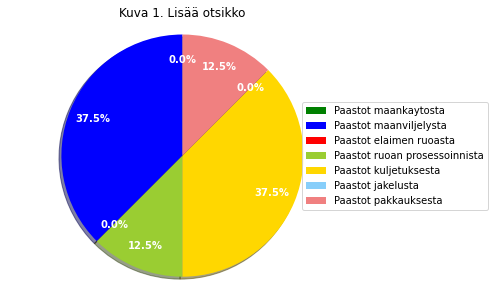

In [109]:
# Muodostetaan haluttu kuvaaja

labels = names
sizes = values

colors = ['green','blue','red','yellowgreen', 'gold', 'lightskyblue', 'lightcoral'] # Valitaan värit
# Voitte valita haluamanne värit sijoittamalla.

patches, texts, pcts = plt.pie(sizes, colors=colors, autopct='%.1f%%', pctdistance=0.8, shadow=True, startangle=90)
plt.legend(patches, labels, bbox_to_anchor=(1.15,0.5), loc="center right", bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0, bottom=0.1, right=1)
plt.gca().axis("equal")
plt.setp(pcts, color='white', fontweight='bold')
plt.tight_layout()

plt.title ("Kuva 1. Lisää otsikko") # Lisätkää kuvaajalle sopiva otsikko, mitä tällä kuvaajalla kerrotaan?

plt.show()

Mitä ajatuksia tämä kuvaaja herättää teissä? Oliko jonkin osa-alueen suuruus suurempi/pienempi kuin mitä kuvittelitte?

Kirjoittakaa lopuksi raportti, johon sisällytätte
1. tekemänne kuvaajat ja niiden sanalliset selitykset
2. havainnot kuvaajista
3. vastaukset kysymyksiin
4. tieto siitä, miten teidän ryhmään voi ottaa yhteyttä jatkokysymyksiin liittyen

Raportti on tärkeää kirjoittaa niin, että jatkava ryhmä saa tarpeeksi tietoa selvittämistänne asioista, yksinkertaisesti ja kattavasti.

# Ryhmä 4

Teidän ryhmän tarkoituksena on perehtyä aikaisempien ryhmien kirjoittamiin raportteihin, ja koostaa näistä yhteinen kokonaisuus esitettäväksi. Hyödyntäkää aikaisempia ryhmiä esittämällä tarkentavia kysymyksiä. Jos onnistutte löytämään kysymyksiä mihin ette löydä vastauksia, jättäkää ne teidän esitykseen. On mahtavaa esittää pohdiskeleviä kysymyksiä oman esityksen aikana!

Esityksessä tulisi käydä ilmi ainakin seuraavat asiat:
1. Kulkuvälineisiin liittyvä data, niiden päästöjen ja siihen vaikuttavien asioiden vertailu keskenään. Mistä nämä erot voivat johtua? Onko joillakin kulkuvälineillä etuja, mitä muilla kulkuvälineillä ei ole? Kuinka paljon mitäkin kulkuvälinettä käytetään?
2. Selittäkää läpi esiintyvät yksiköt ja kuvaajat.
3. Vertailkaa näitä kahta valittua ruoka-ainetta keskenään. Mitä ajatuksia tästä herää? Onko vaikutusta sillä, onko tuote tuotettu lähellä vai kaukana? Onko näillä tuotteilla erisuuret päästöt, ja mistä nämä erot syntyvät?

Esittäkää lopputuloksenne, pohdintanne ja havaintonne valitsemallanne tavalla.
